# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [2]:
student_number = 402212269
full_name = "Amir Mohammad Ezzati"
assert student_number and full_name is not None, 'pls input your information'

# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [4]:
#TODO
df = pd.read_csv('nutrition.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [5]:
#TODO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [6]:
#TODO

df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.set_index('ID')
df_non_numeric = df.drop(columns=df_numeric.columns)

df_numeric.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

In [7]:
df_non_numeric.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN


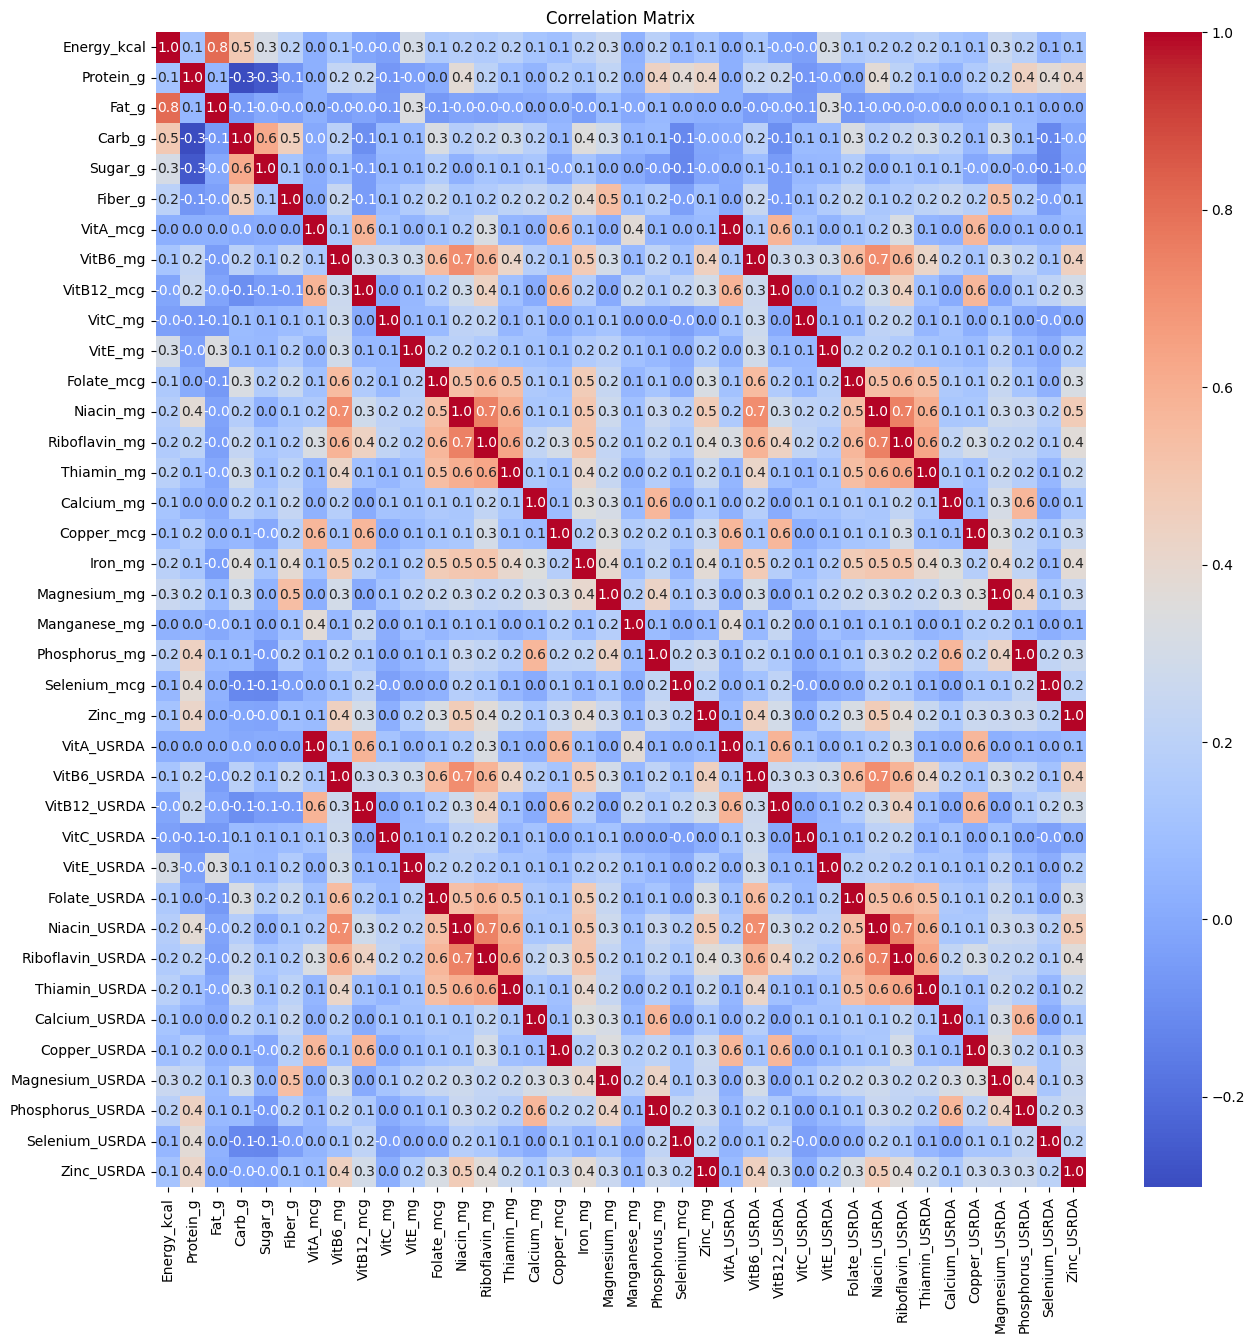

In [8]:
#TODO
corr_ = df_numeric.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

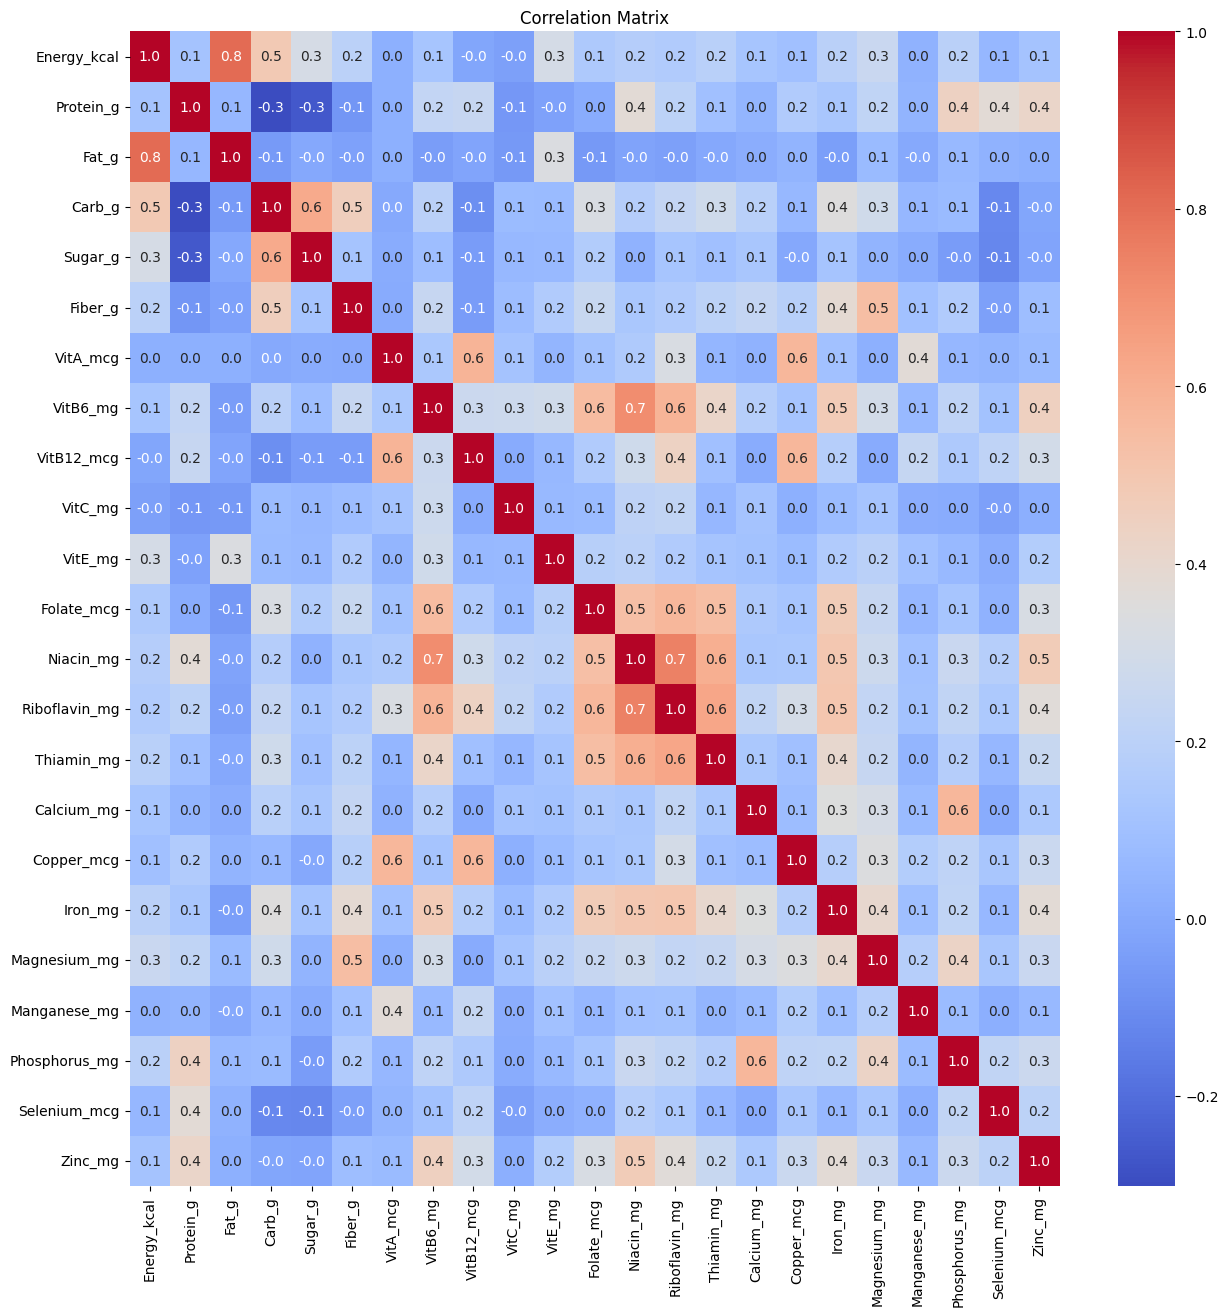

In [9]:
#TODO
redundant_features = []
threshold = 0.9
for i in range(corr_.shape[0]):
    for j in range(i):
        if abs(corr_.iloc[i, j]) > threshold:
            redundant_features.append(corr_.columns[i])

df_numeric_rr = df_numeric.drop(columns=redundant_features) # removing redundant

corr_new = df_numeric_rr.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_new, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

<Figure size 2000x2000 with 0 Axes>

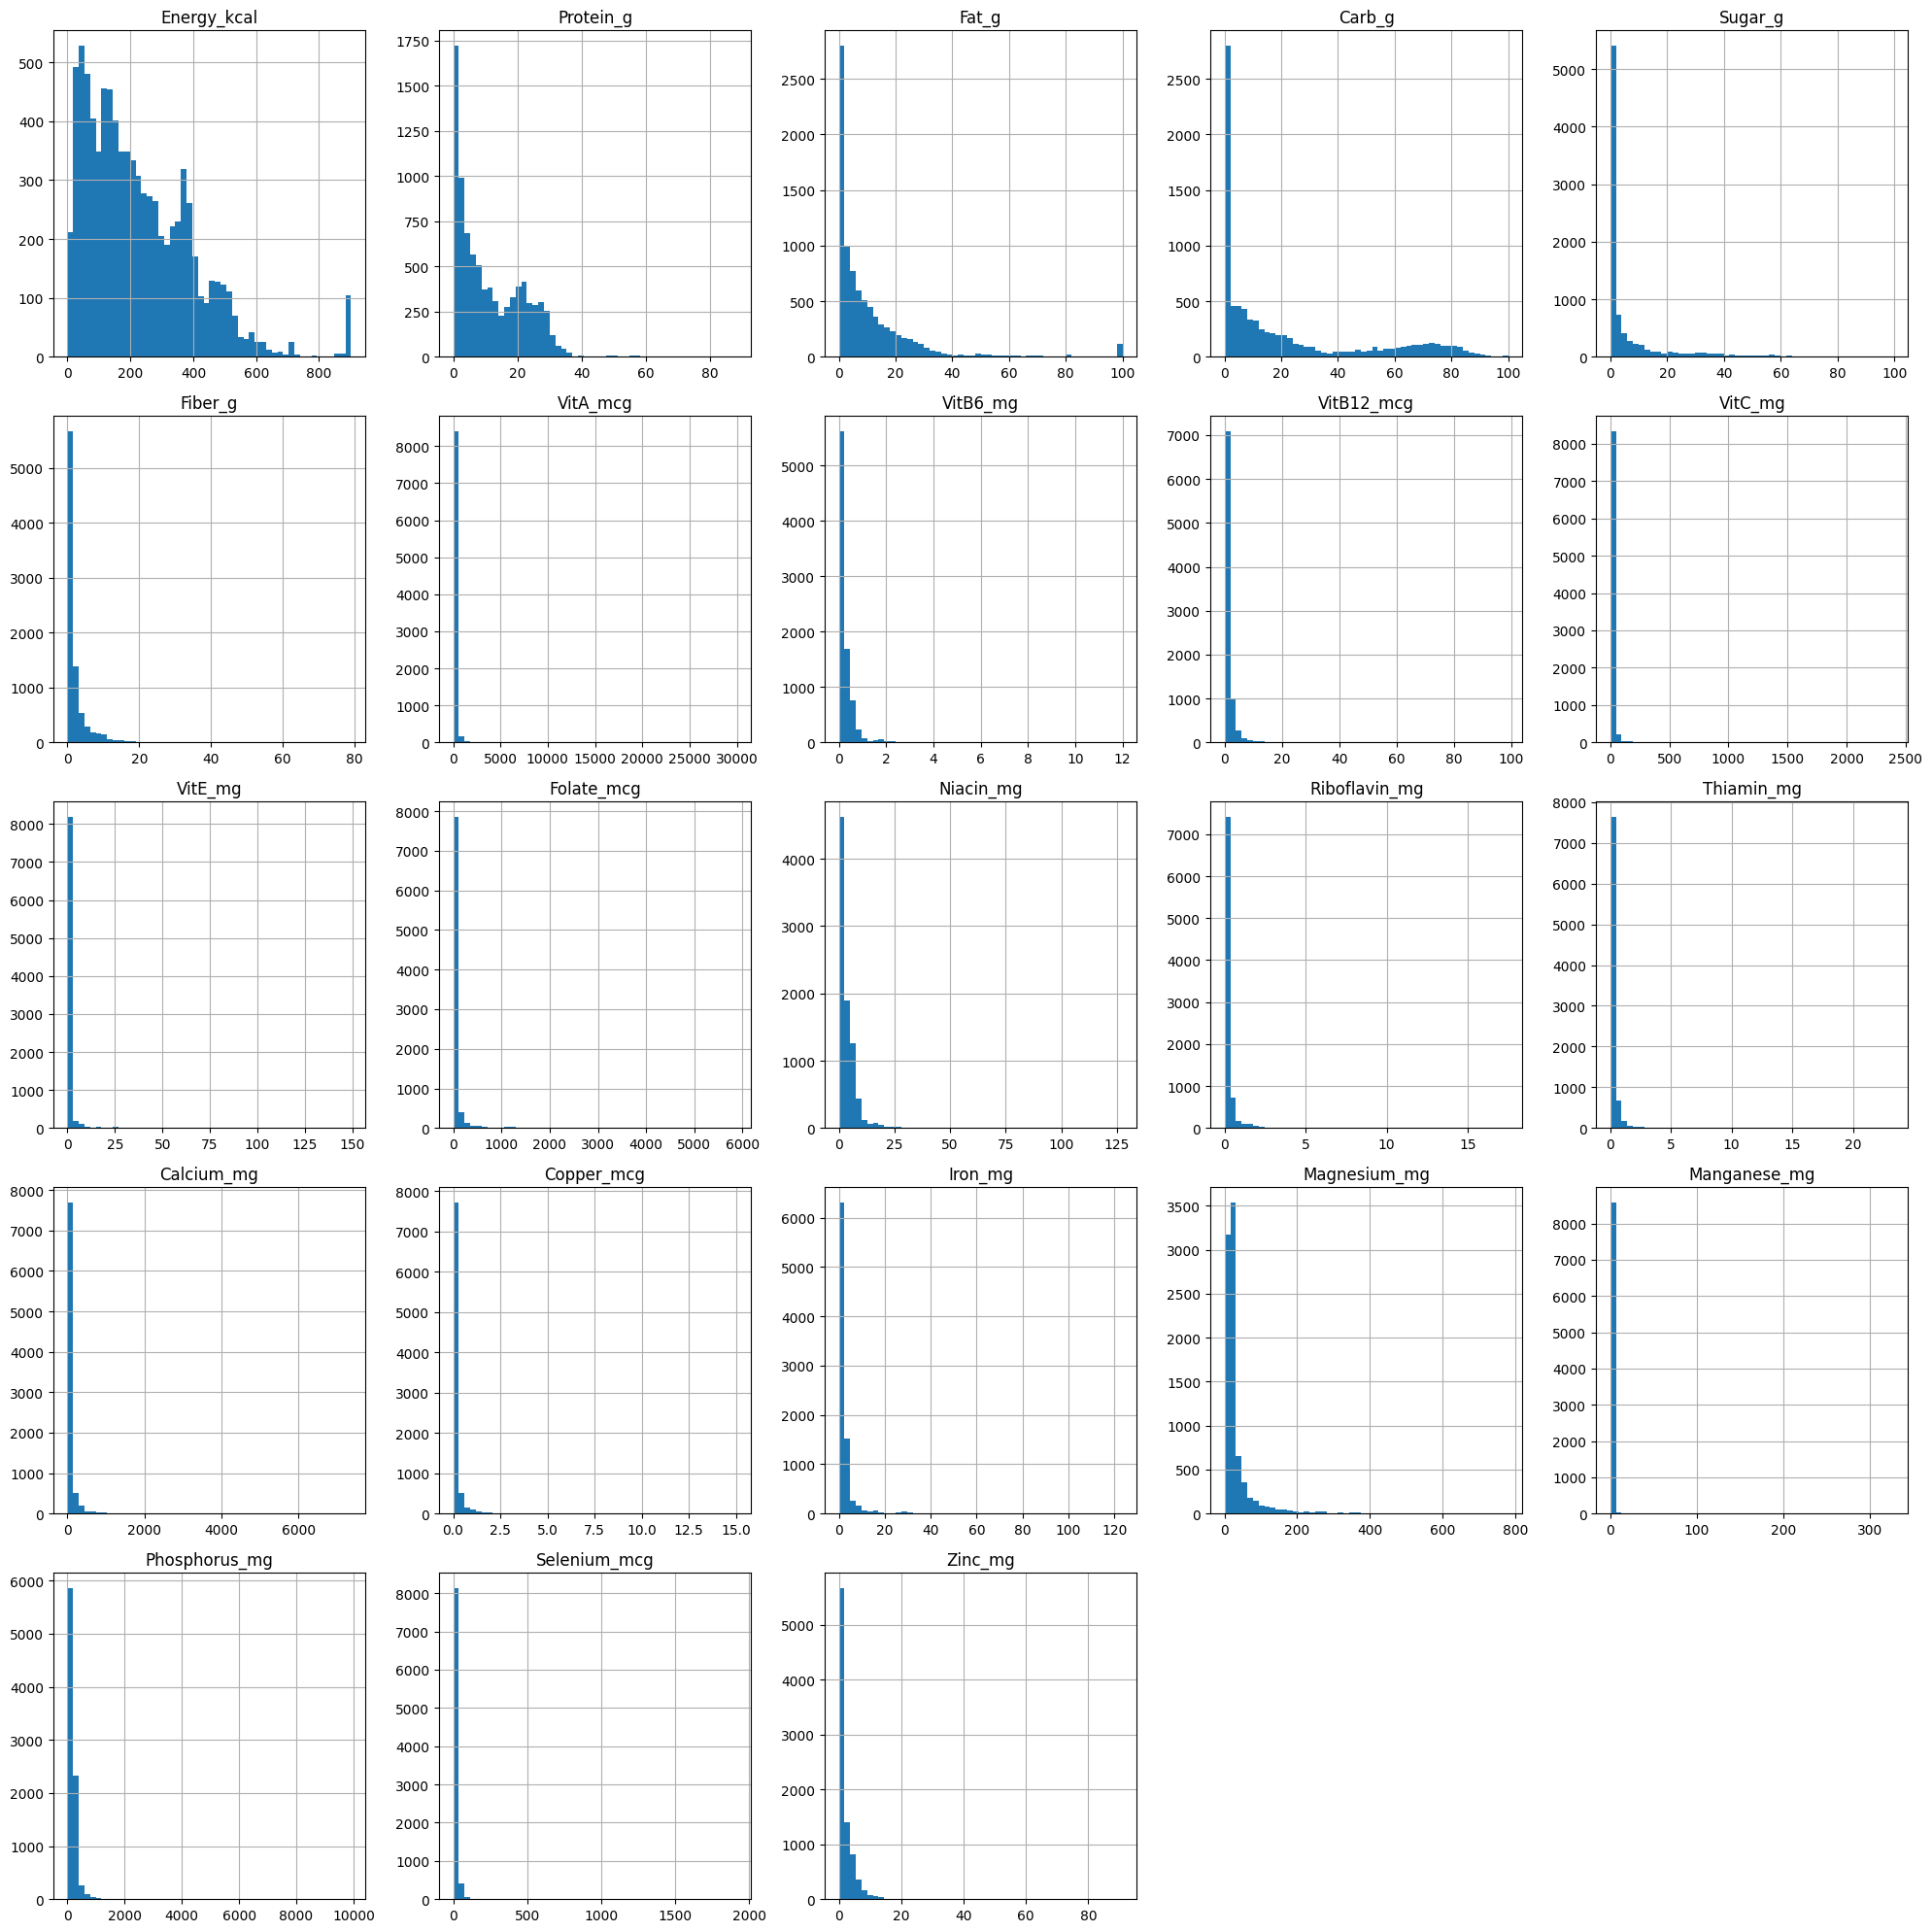

In [10]:
#TODO
plt.figure(figsize=(20, 20))
df_numeric_rr.hist(bins=50, figsize=(20, 20))
plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [11]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
df_numeric_rr = df_numeric_rr + 1
df_boxcoxed = pd.DataFrame(index=df_numeric_rr.index)

for i in df_numeric_rr.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(df_numeric_rr.loc[:, i])[0]

df_boxcoxed.head()


,Energy_kcal_boxcoxed,Protein_g_boxcoxed,Fat_g_boxcoxed,Carb_g_boxcoxed,Sugar_g_boxcoxed,Fiber_g_boxcoxed,VitA_mcg_boxcoxed,VitB6_mg_boxcoxed,VitB12_mcg_boxcoxed,VitC_mg_boxcoxed,...,Riboflavin_mg_boxcoxed,Thiamin_mg_boxcoxed,Calcium_mg_boxcoxed,Copper_mcg_boxcoxed,Iron_mg_boxcoxed,Magnesium_mg_boxcoxed,Manganese_mg_boxcoxed,Phosphorus_mg_boxcoxed,Selenium_mcg_boxcoxed,Zinc_mg_boxcoxed
ID,,,,,,,,,,,,,,,,,,,,,
1001,28.218570,0.659887,3.902525,0.058330,0.057269,0.0,2.688245,0.002981,0.140152,0.0,...,0.031506,0.004927,3.186843,0.000000,0.019689,1.187185,0.000000,5.897452,0.674112,0.083954
1002,28.218570,0.659887,3.902525,0.058330,0.057269,0.0,2.688245,0.002981,0.111836,0.0,...,0.031506,0.004927,3.186843,0.015185,0.142210,1.187185,0.003960,5.774520,0.674112,0.048072
1003,30.599777,0.253858,4.059063,0.000000,0.000000,0.0,2.711488,0.000998,0.009878,0.0,...,0.004943,0.000997,1.601403,0.000997,0.000000,0.000000,0.000000,1.777189,0.000000,0.009920
1004,21.085439,4.504850,3.087499,1.232397,0.360184,0.0,2.509633,0.120684,0.468905,0.0,...,0.191363,0.026682,6.150173,0.035193,0.249940,3.998436,0.008798,19.739039,2.458809,0.896741
1005,21.527013,4.665389,3.113172,1.364671,0.365391,0.0,2.573502,0.056903,0.474341,0.0,...,0.183964,0.013442,6.384389,0.022202,0.323005,4.062188,0.011644,20.962339,2.458809,0.889206


Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

<Figure size 2000x2000 with 0 Axes>

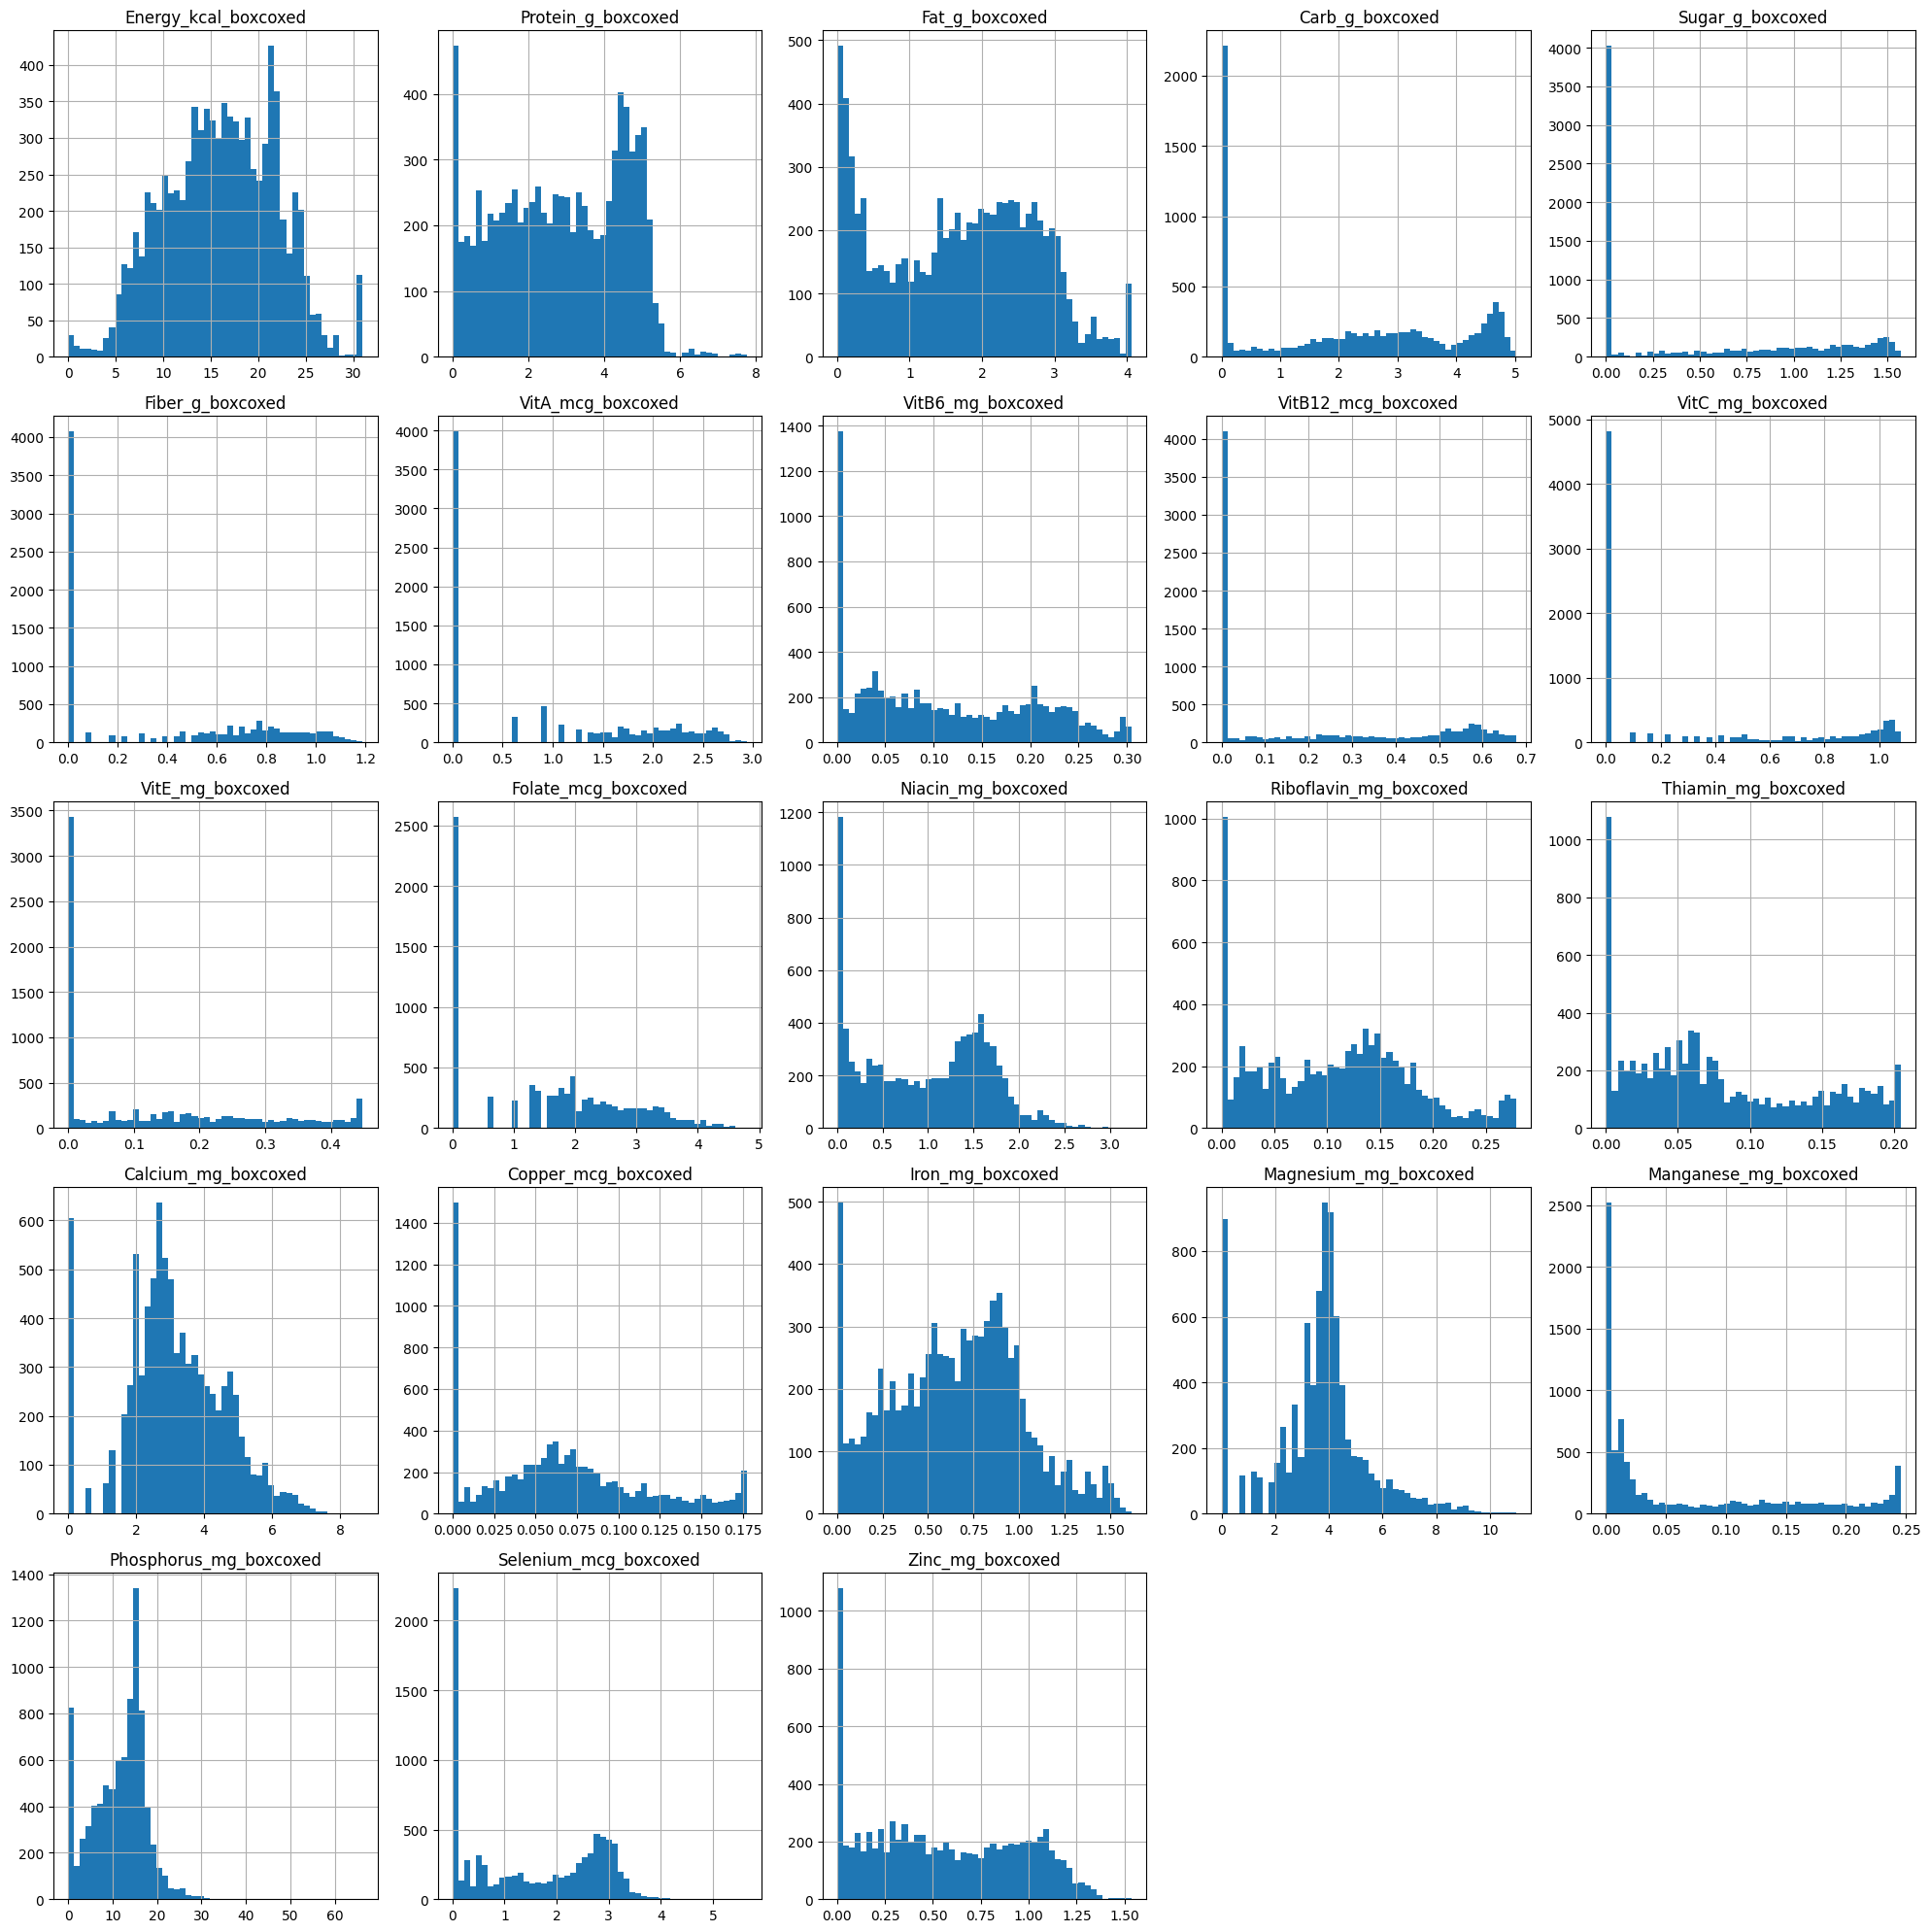

In [12]:
#TODO
plt.figure(figsize=(20, 20))
df_boxcoxed.hist(bins=50, figsize=(20, 20))
plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [13]:
#TODO
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df_boxcoxed)
df_standardized = pd.DataFrame(data_standardized, index=df_boxcoxed.index, columns=df_boxcoxed.columns)

print("total mean: ", round(df_standardized.values.mean(), 1))
print("total standard dev: ", round(df_standardized.values.std(), 1))

total mean:  -0.0
total standard dev:  1.0


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [14]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        #TODO
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        covariance_matrix = np.cov(X_centered, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        
        self.components = eigenvectors[:, :self.n_components]
        
        total_variance = np.sum(eigenvalues)
        explained_variance = eigenvalues[:self.n_components]
        self.explained_variance_ratio_ = explained_variance / total_variance

    def transform(self, X):
        #TODO
        # return the pca result
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        #TODO
        #return explained variance of shape (n_components, )
        return self.explained_variance_ratio_
    
    def get_components(self):
        #TODO
        #return pca components (eigenvectors)
        return self.components


Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [15]:
#TODO
print('number of features: ', df_standardized.shape[1])
pca = CustomPCA(n_components=df_standardized.shape[1])
pca.fit(df_standardized)

transformed_data = pca.transform(df_standardized)
print(transformed_data.shape)

print(pca.get_components().shape)
print(pca.get_explained_variance_ratio())

number of features:  23
(8618, 23)
(23, 23)
[0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828886 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]


#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


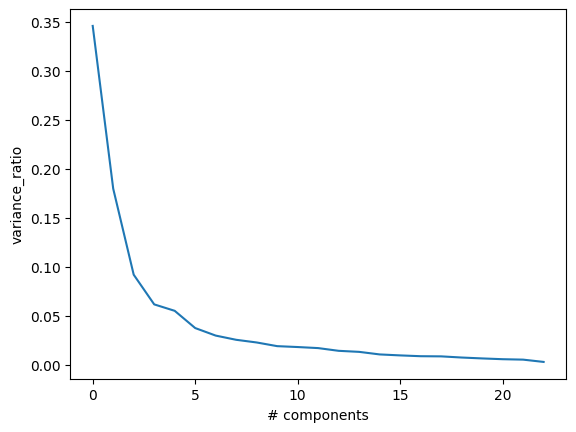

In [16]:
#TODO
x = np.arange(len(pca.get_explained_variance_ratio()))
y = pca.get_explained_variance_ratio()

plt.plot(x, y)
plt.xlabel('# components')
plt.ylabel('variance_ratio')
plt.show()

therefore we are going to pick 5 components

In [17]:
#TODO
#print the total explained variance ration for the first 5 components
pca = CustomPCA(n_components=5)
pca.fit(df_standardized)

transformed_data = pca.transform(df_standardized)
print(transformed_data.shape)

print(pca.get_components().shape)
print(pca.get_explained_variance_ratio())

(8618, 5)
(23, 5)
[0.34554936 0.17971019 0.09201387 0.06176452 0.05520037]


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [18]:
#TODO
df1 = df_non_numeric.dropna(axis=1)

# df1.head()
pca_df = pd.DataFrame(transformed_data, columns=[f'c{i}' for i in range(1,6)])
merged_df = df1.join(pca_df)

order = ['ID'] + [f'c{i}' for i in range(1,6)] + ['FoodGroup', 'ShortDescrip', 'Descrip']
merged_df = merged_df[order]
merged_df = merged_df.set_index('ID')

merged_df.head()

,c1,c2,c3,c4,c5,FoodGroup,ShortDescrip,Descrip
ID,,,,,,,,
1001,-2.638414,-1.702512,1.283725,3.759546,2.413650,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted"
1002,-2.537931,-1.550464,1.279816,3.634065,2.492683,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt"
1003,-3.751335,-2.080190,2.067932,3.668154,2.457203,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous"
1004,2.000578,-1.361858,-0.395834,2.432792,0.887796,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue"
1005,1.582713,-1.321484,-0.238444,2.597599,1.286317,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick"


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

In [19]:
#TODO
corr = pca_df.corr()
round(corr, 1)

,c1,c2,c3,c4,c5
c1,1.0,-0.0,0.0,0.0,0.0
c2,-0.0,1.0,-0.0,0.0,0.0
c3,0.0,-0.0,1.0,-0.0,-0.0
c4,0.0,0.0,-0.0,1.0,0.0
c5,0.0,0.0,-0.0,0.0,1.0


# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [20]:
# TODO get eigenvectors
eigenvectors = pca.get_components()
eigenvectors

array([[ 0.16512628,  0.04185011,  0.50806205,  0.15878718,  0.20433604],
       [ 0.28608595, -0.19612698,  0.02682842, -0.09094363,  0.04614783],
       [ 0.16148847, -0.12357548,  0.40950485,  0.28277447,  0.26673961],
       [-0.03376713,  0.41454153,  0.25095208, -0.02518521, -0.10139647],
       [-0.07613188,  0.29564023,  0.20865125,  0.27965746, -0.2642623 ],
       [-0.0046634 ,  0.39783227,  0.15364033, -0.11912218, -0.0758999 ],
       [ 0.05699607,  0.0957005 , -0.29808857,  0.53979166, -0.05792837],
       [ 0.2706465 , -0.0521657 , -0.12185037, -0.01138152, -0.25466299],
       [ 0.2213216 , -0.26567098, -0.10747636,  0.16706766, -0.1956371 ],
       [-0.06983022,  0.24231394, -0.33448952,  0.12928762, -0.24963405],
       [ 0.09080767,  0.10430995, -0.01247288,  0.53770958,  0.25060476],
       [ 0.16785649,  0.23839136, -0.26429784,  0.01165532,  0.10499969],
       [ 0.29409384, -0.06419697,  0.0559907 , -0.06522343, -0.26442327],
       [ 0.28268656,  0.0242405 ,  0.0

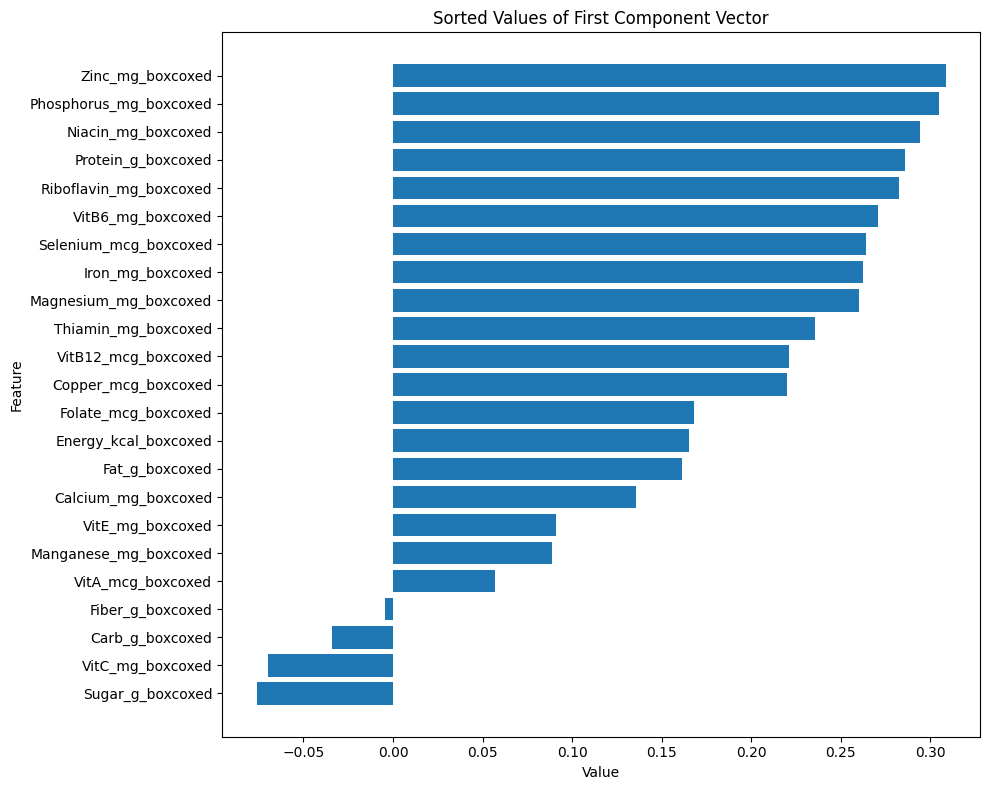

In [23]:
#TODO
comp1 = eigenvectors[:, 0]
sorted_indices = np.argsort(comp1)
sorted_comp1 = sorted(comp1)

plt.figure(figsize=(10, 8))
plt.barh(range(len(comp1)), sorted_comp1, align='center')
plt.yticks(range(len(comp1)), df_standardized.columns[sorted_indices])
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Sorted Values of First Component Vector')
plt.tight_layout()
plt.show()

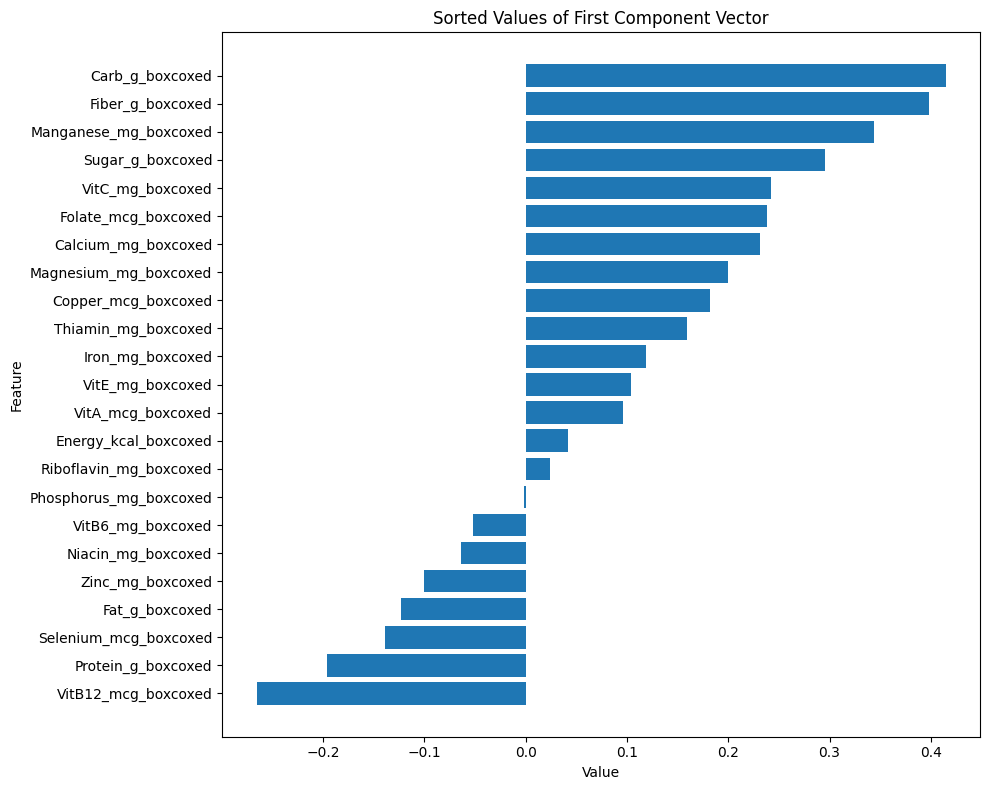

In [24]:
#TODO
comp2 = eigenvectors[:, 1]
sorted_indices = np.argsort(comp2)
sorted_comp2 = sorted(comp2)

plt.figure(figsize=(10, 8))
plt.barh(range(len(comp2)), sorted_comp2, align='center')
plt.yticks(range(len(comp2)), df_standardized.columns[sorted_indices])
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Sorted Values of First Component Vector')
plt.tight_layout()
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">
In first component we see the highest positive contributions come from Zinc_mg, Phosphorus_mg, Niacin_mg, Protein_g, and Riboflavin_mg. While the highest negative contributions come from Sugar_g, VitC_mg, Carb_g, and Fiber_g.           
Positive scores: Associated with foods Rich in proteins and minerals.         
Negative scores: Associated with foods Rich in sugars and carbohydrates.        
        
<br>  
<br>               
In second component we see the highest positive contributions come from Carb_g, Fiber_g, and Manganese_mg. While the highest negative contributions come from VitB12_mcg, Protein_g, Selenium_mg, Fat_g, and Zinc_mg.           
Positive Scores: Associated with foods rich in carbohydrates and fiber.         
Negative Scores: Associated with foods rich in proteins, fats, and specific vitamins (e.g., Vitamin B12, Selenium).

</span>



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

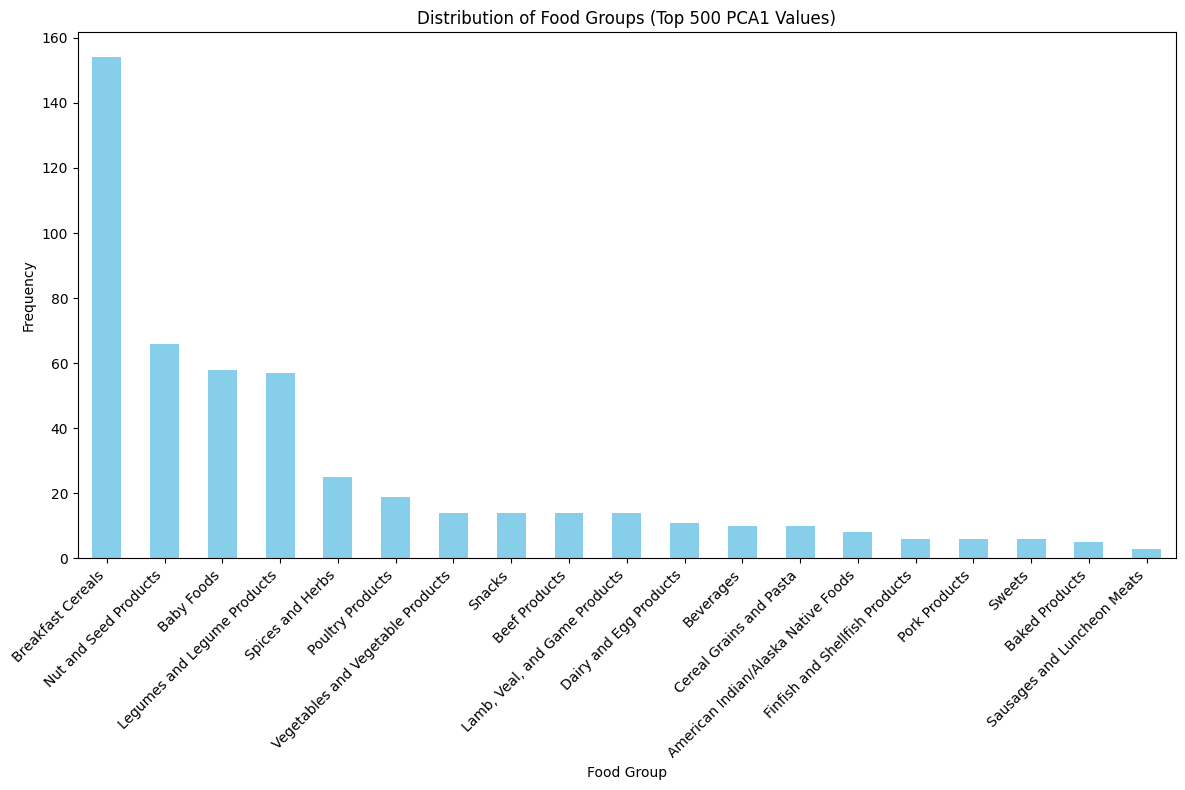

In [130]:
#TODO
top_500_pca1 = merged_df.nlargest(500, 'c1')

plt.figure(figsize=(12, 8))
top_500_pca1['FoodGroup'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Food Group')
plt.ylabel('Frequency')
plt.title('Distribution of Food Groups (Top 500 PCA1 Values)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

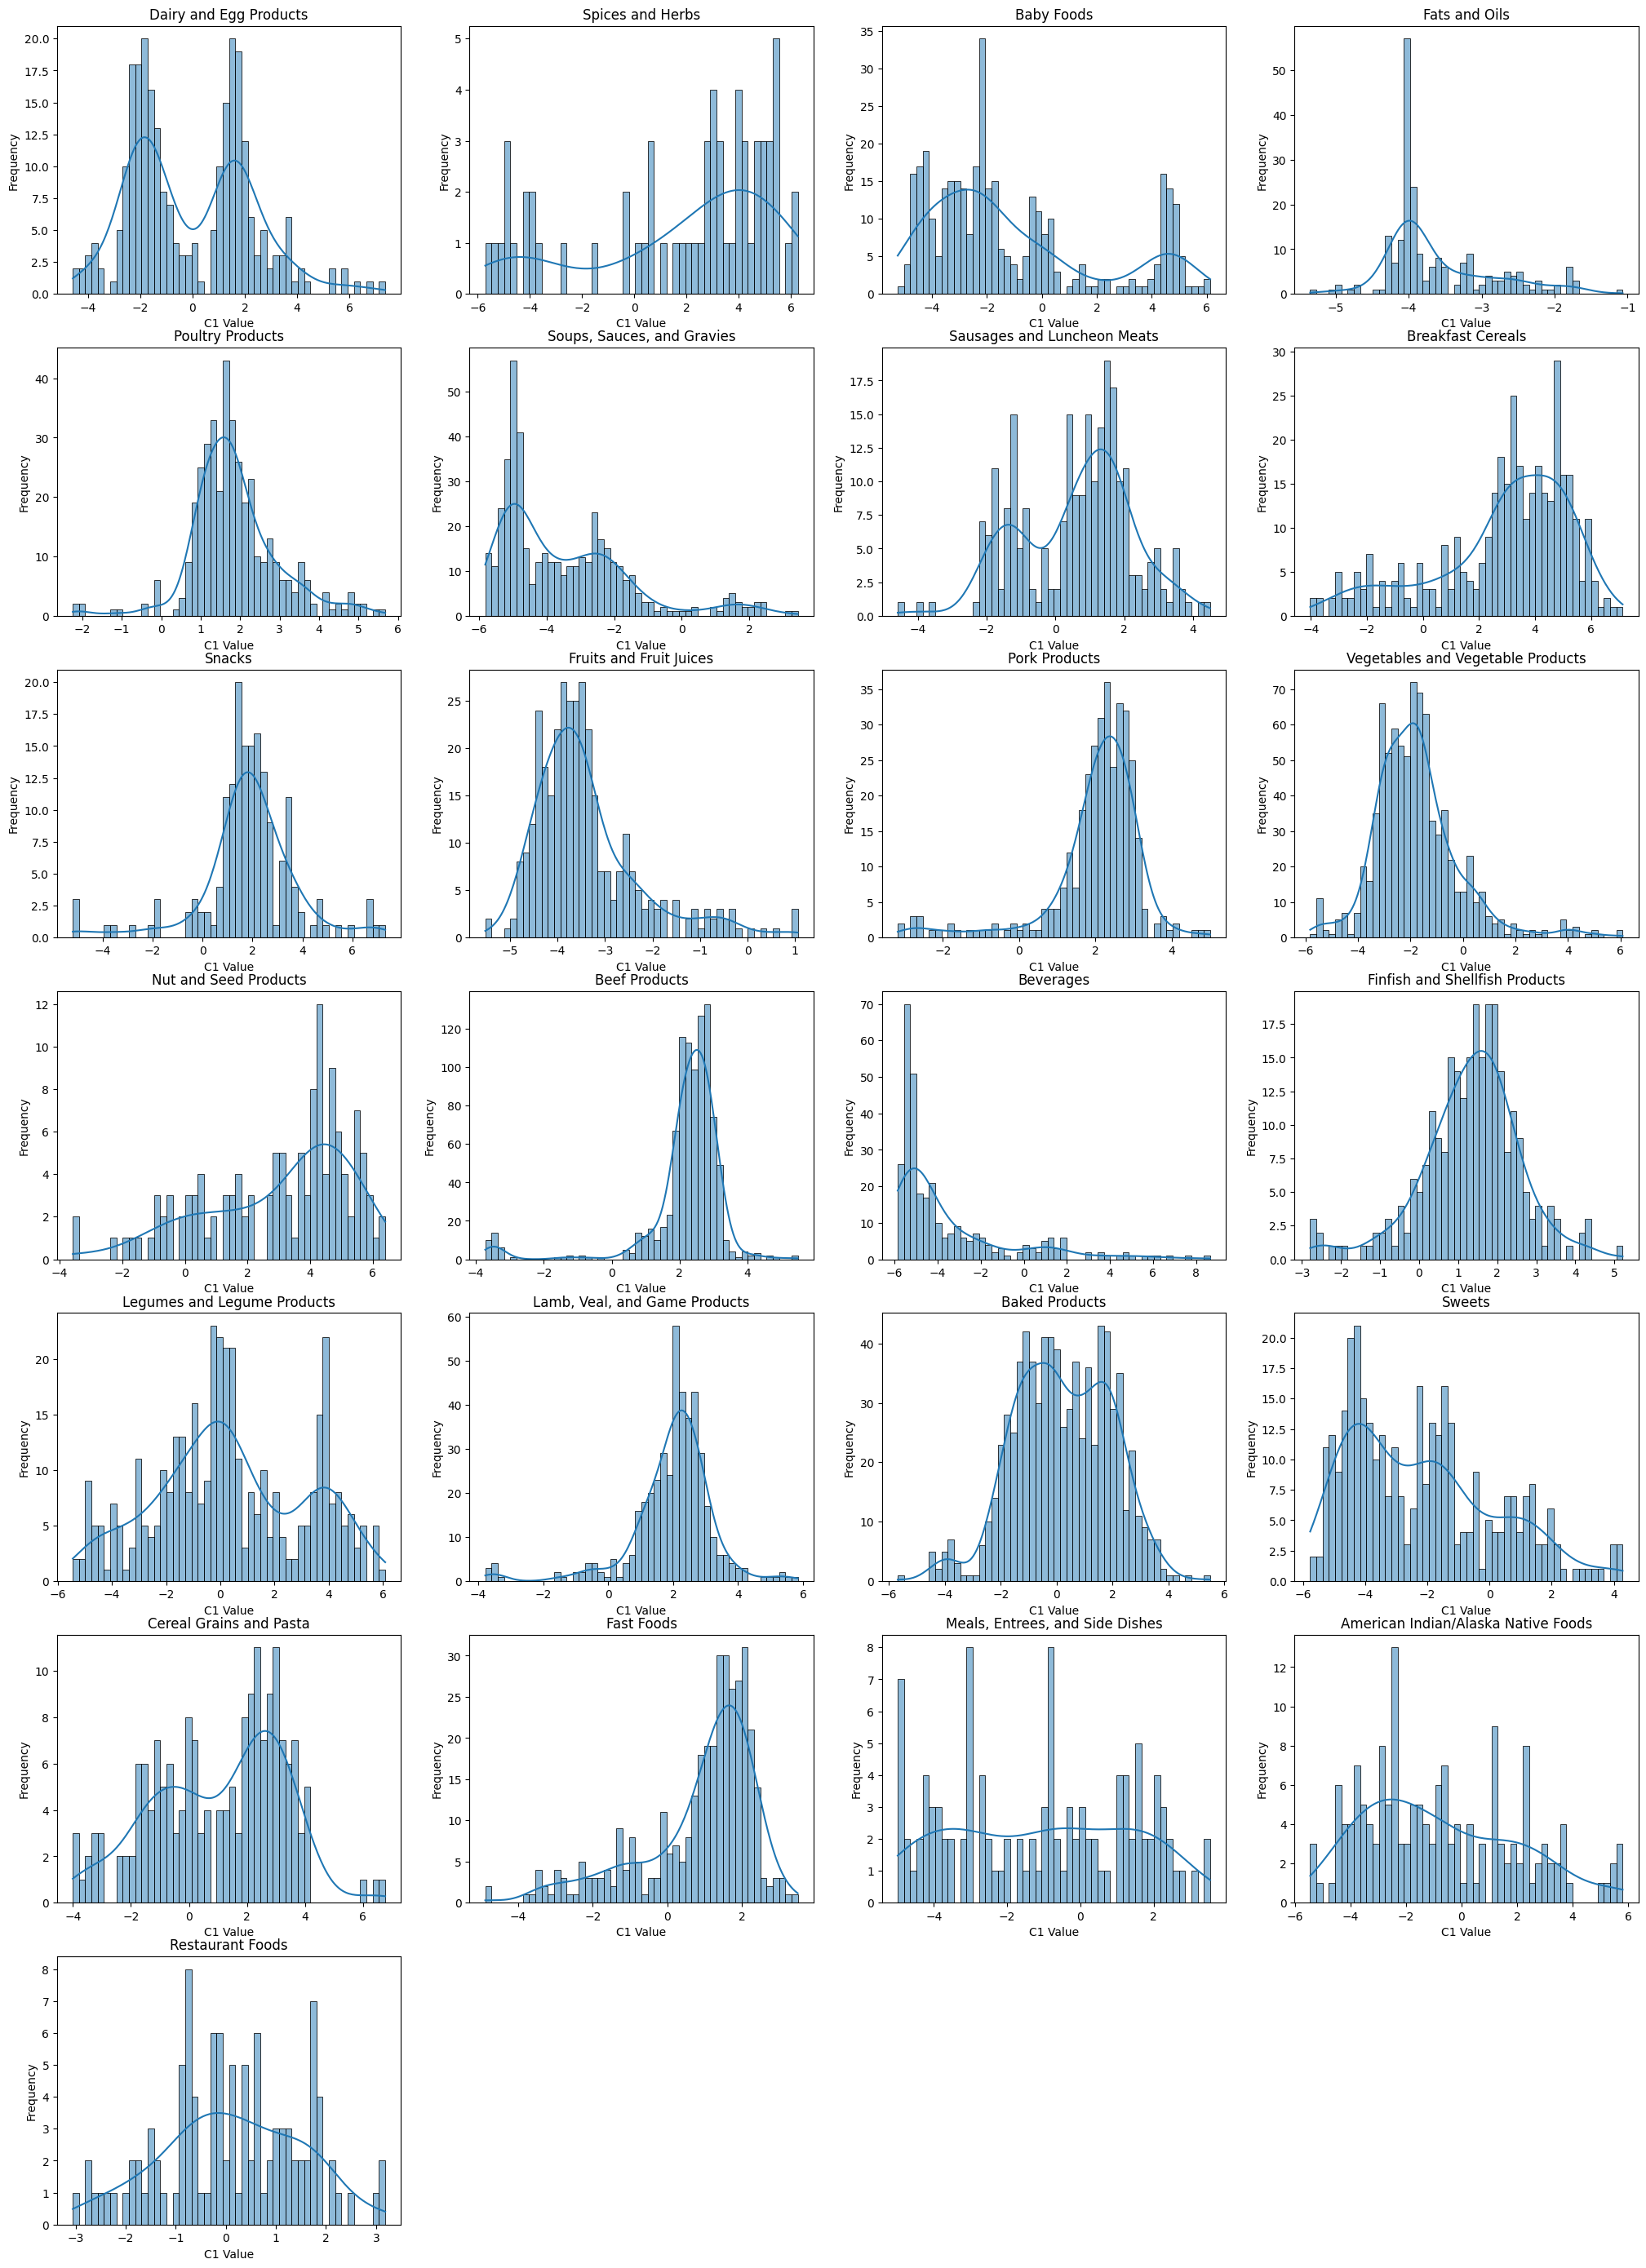

In [148]:
#TODO
food_groups = merged_df['FoodGroup'].unique()

num_rows = (len(food_groups) + 3) // 4
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(25, 5 * num_rows))

axes = axes.flatten()

for ax, food_group in zip(axes, food_groups):
    sns.histplot(data=merged_df[merged_df['FoodGroup'] == food_group], bins=50, x='c1', kde=True, ax=ax)
    ax.set_title(f'{food_group}')
    ax.set_xlabel('C1 Value')
    ax.set_ylabel('Frequency')

for i in range(len(food_groups), len(axes)):
    fig.delaxes(axes[i])

Do the same for pca2.

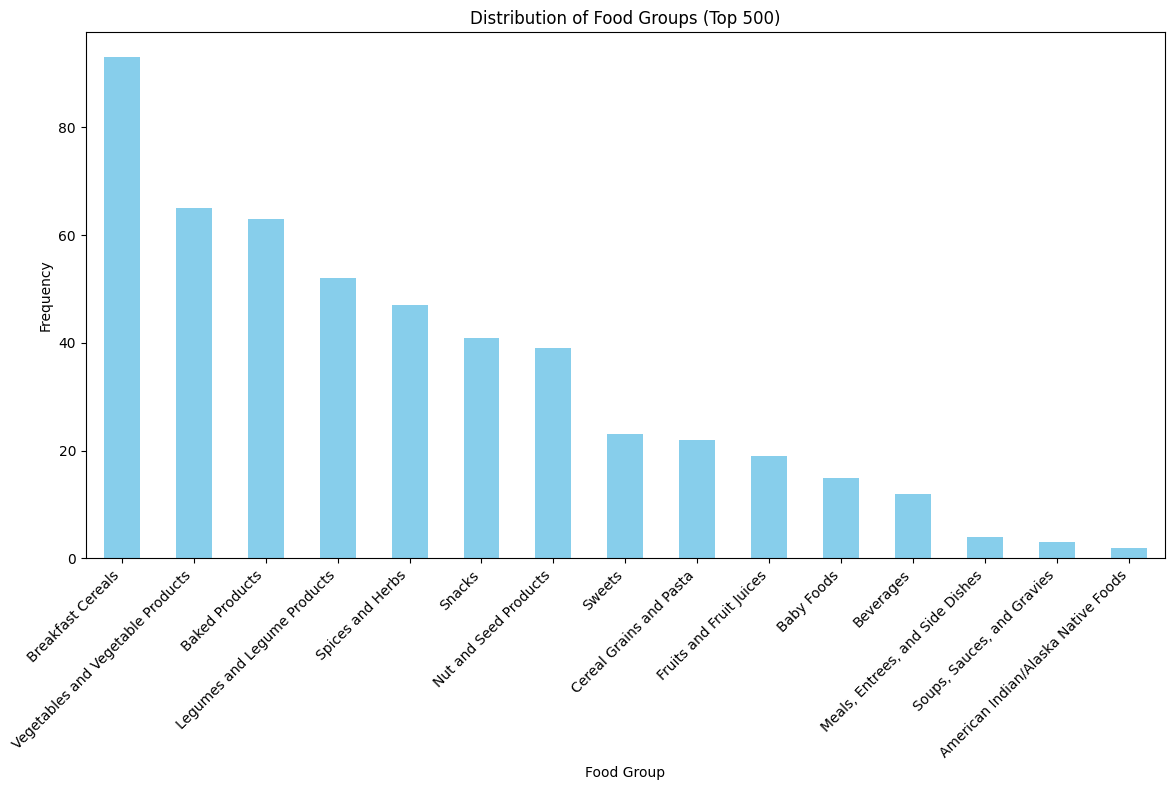

In [149]:
#TODO
top_500_pca2 = merged_df.nlargest(500, 'c2')

plt.figure(figsize=(12, 8))
top_500_pca2['FoodGroup'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Food Group')
plt.ylabel('Frequency')
plt.title('Distribution of Food Groups (Top 500)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

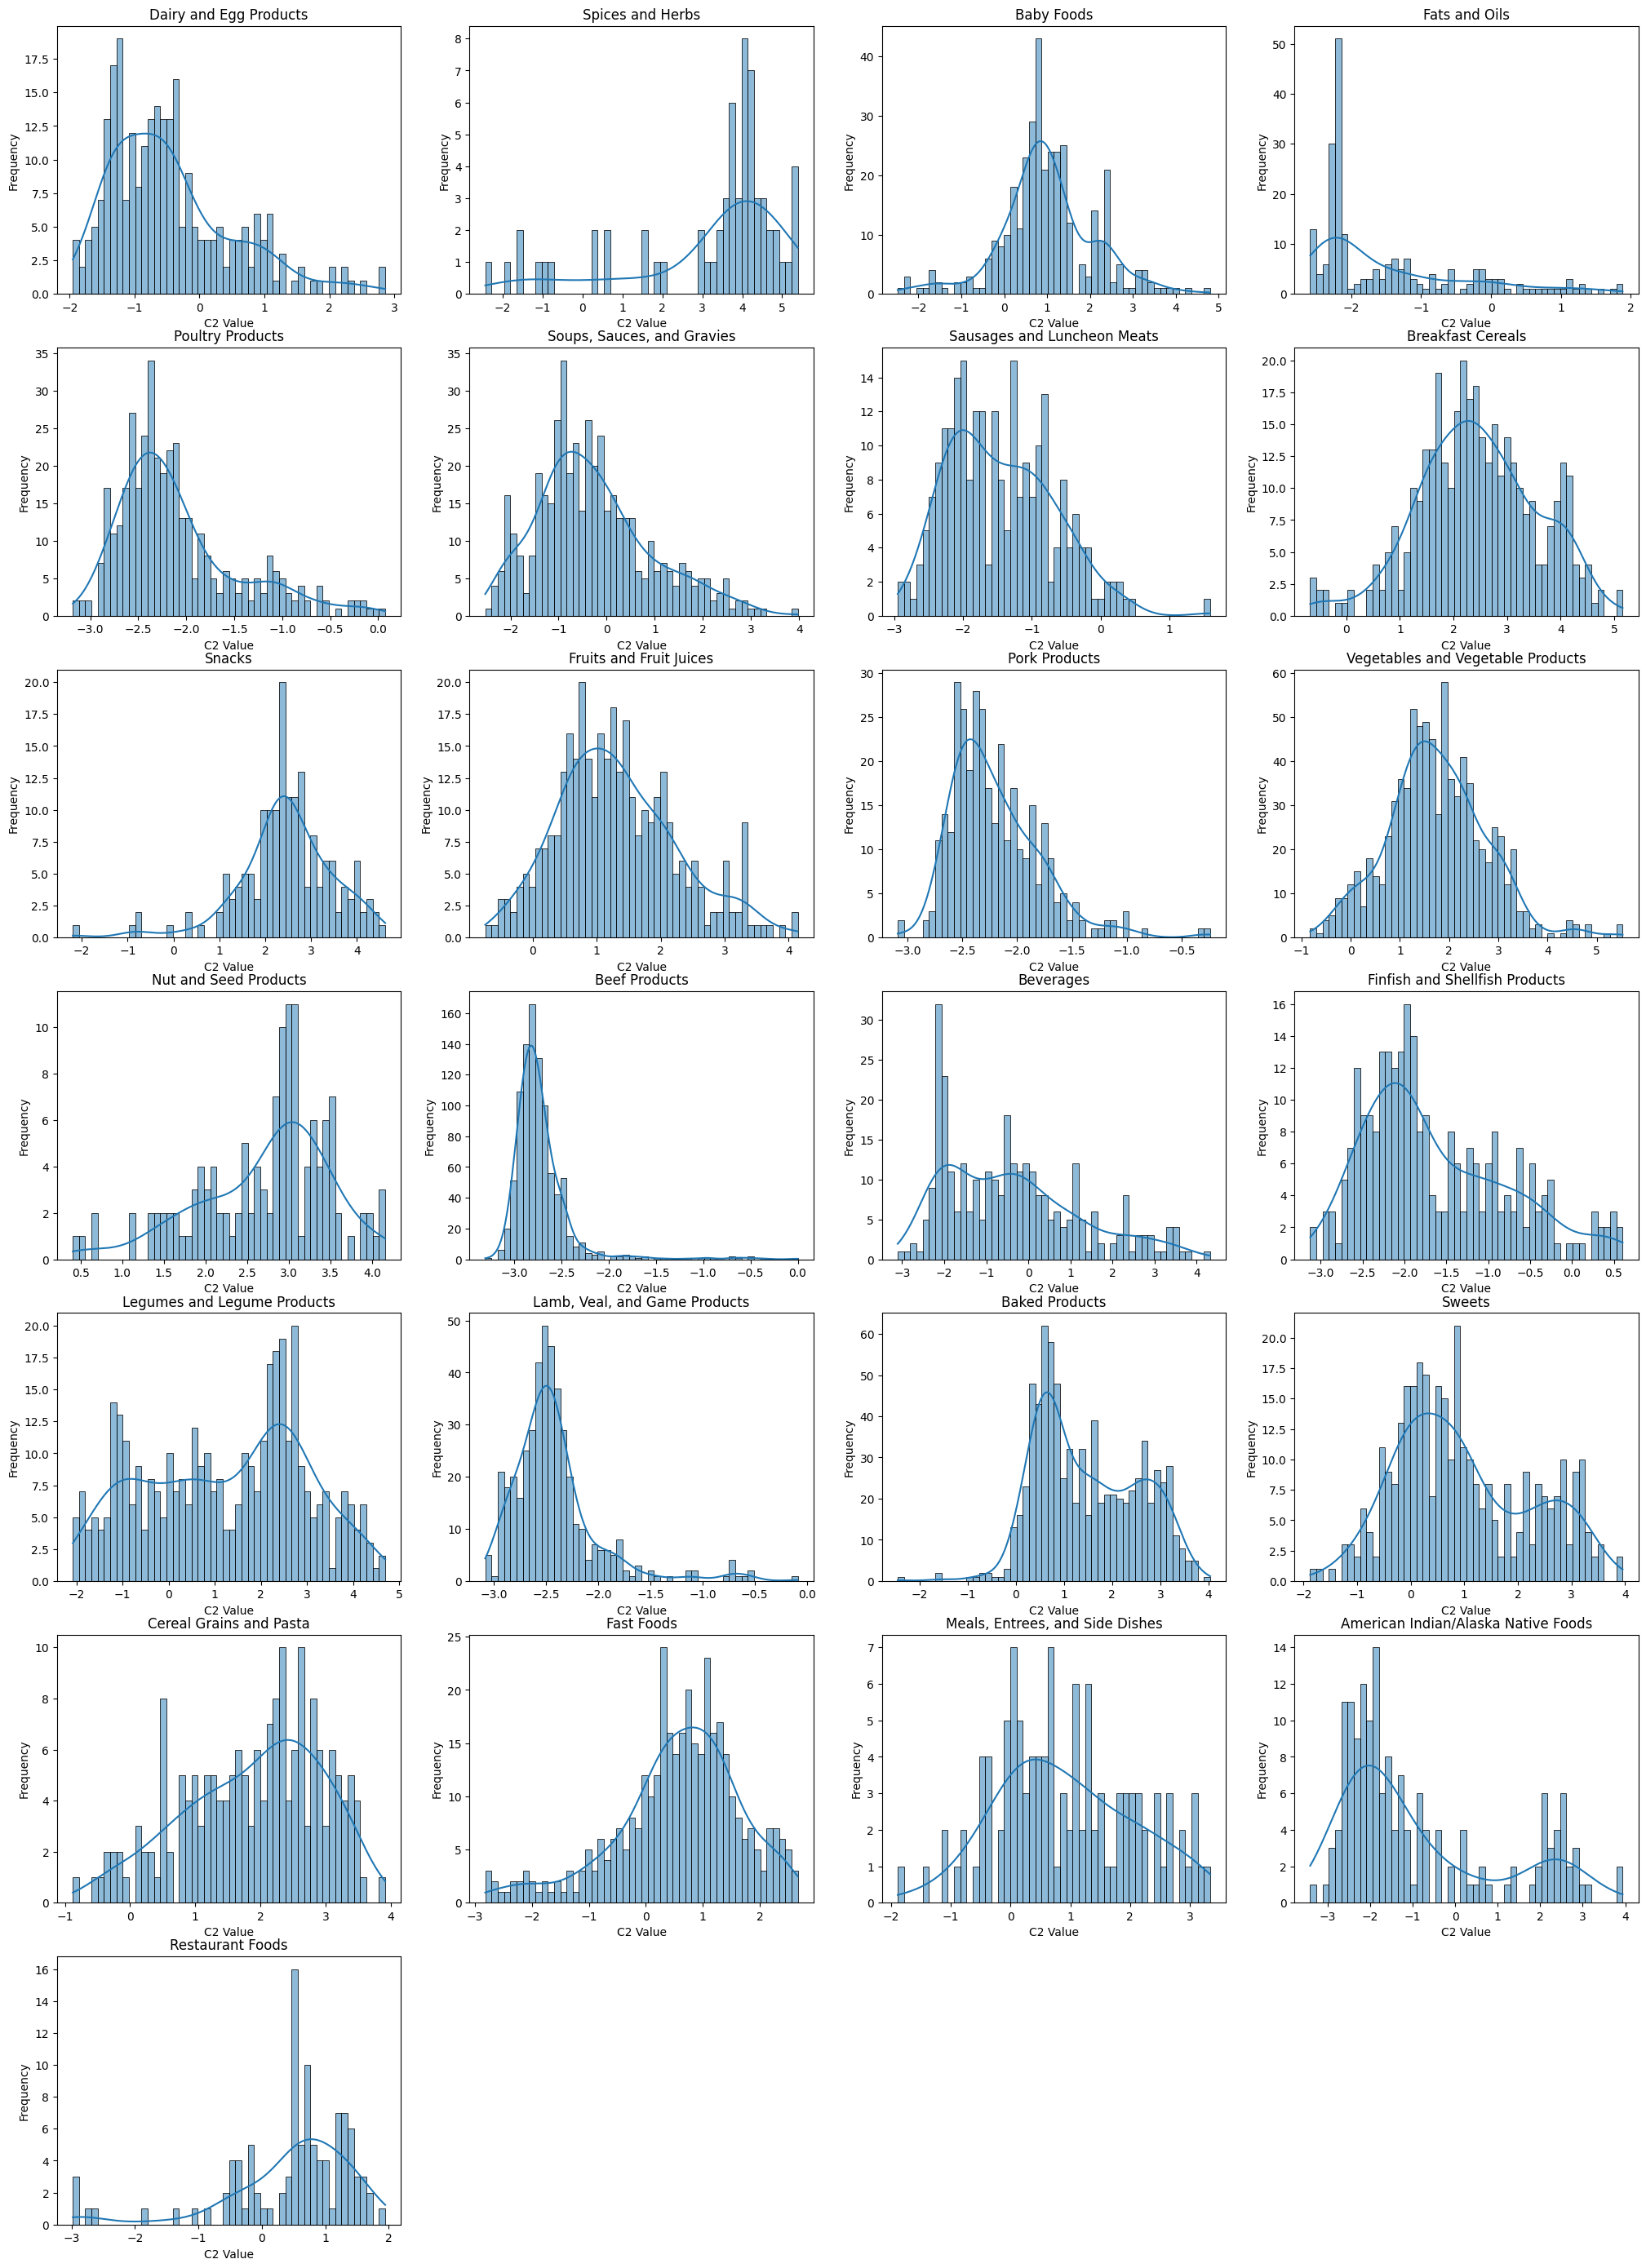

In [150]:
#TODO
food_groups = merged_df['FoodGroup'].unique()

num_rows = (len(food_groups) + 3) // 4
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(25, 5 * num_rows))

axes = axes.flatten()

for ax, food_group in zip(axes, food_groups):
    sns.histplot(data=merged_df[merged_df['FoodGroup'] == food_group], bins=50, x='c2', kde=True, ax=ax)
    ax.set_title(f'{food_group}')
    ax.set_xlabel('C2 Value')
    ax.set_ylabel('Frequency')

for i in range(len(food_groups), len(axes)):
    fig.delaxes(axes[i])

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


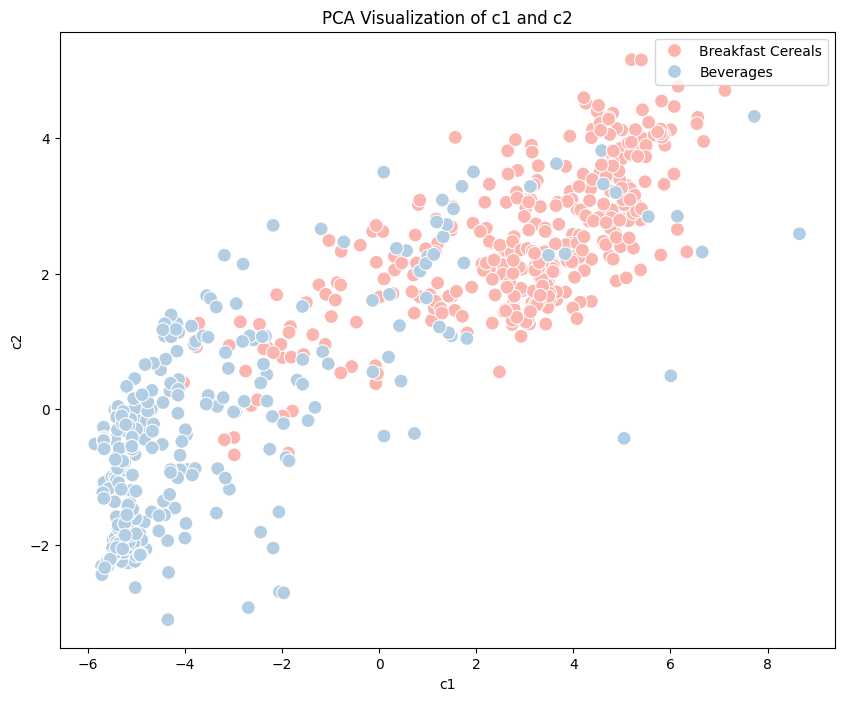

In [156]:
#TODO
df = merged_df[merged_df['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='c1', y='c2', hue='FoodGroup', palette='Pastel1', s=100)
plt.title('PCA Visualization of c1 and c2')
plt.xlabel('c1')
plt.ylabel('c2')
plt.legend()
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">The scatter plot of c1 and c2 shows a clear separation between Beverages and Breakfast Cereals along the c1 and c2 axes. Breakfast Cereals have higher c1 values than Beverages which have lower c1 values. Though there is some overlap, the first principal component (c1) effectively distinguishes between these food groups. c2 provides additional separation. Breakfast Cereals also have higher c2 values than Beverages. Therefore In the region with high c1 and c2, the probability of finding Breakfast Cereals is higher than Beverages.  This shows that the value of c1 and c2 refers to the components that are usually present in Breakfast Cereals more than Beverages.</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">The distribution of PCA1 values for each food group, as depicted in the previous histogram plots, complements the scatter plot by offering a more detailed perspective on how individual food groups are distributed along the c1 axis. For instance, Breakfast Cereals exhibit a broad distribution along c1, predominantly occupying higher values—consistent with their position in the scatter plot. Similarly, Beverages cluster around lower PCA1 values in both the histogram and the scatter plot. This alignment between the distribution plots and the scatter plot underscores c1’s effectiveness in capturing the primary nutritional distinctions among these food groups. Moreover, the scatter plot provides additional insight by revealing the relative positions of individual samples in the two-dimensional PCA space, thereby highlighting the broader nutritional landscape and the degree of overlap between different food groups.</span>

